<a href="https://colab.research.google.com/github/silviootero/Proyecto-sustituto-Modelos1/blob/main/01_generate_data_and_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seoul Bike Rental

#### Importamos las librerias

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_log_error
from scipy import stats

#### Subimos la base de datos

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?id=1gt4gMHp6cW4SUDWOcnsRzS8KLyx4CaY5' -O train.csv
!wget --no-check-certificate 'https://drive.google.com/uc?id=1m1Abp4lseZDXUsDlEjKmxcv1UHDmGDZY' -O test.csv


--2024-09-09 00:42:05--  https://drive.google.com/uc?id=1gt4gMHp6cW4SUDWOcnsRzS8KLyx4CaY5
Resolving drive.google.com (drive.google.com)... 74.125.26.101, 74.125.26.102, 74.125.26.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.26.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1gt4gMHp6cW4SUDWOcnsRzS8KLyx4CaY5 [following]
--2024-09-09 00:42:05--  https://drive.usercontent.google.com/download?id=1gt4gMHp6cW4SUDWOcnsRzS8KLyx4CaY5
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 397948 (389K) [application/octet-stream]
Saving to: ‘train.csv’

train.csv           100%[===================>] 388.62K  --.-KB/s    in 0.005s  

2024-09-09 00:42:07 (81.2 MB/s) - ‘trai

In [ ]:
df_train = pd.read_csv('/content/train.csv',encoding= 'unicode_escape')
df_test = pd.read_csv('/content/test.csv',encoding= 'unicode_escape')


# Eliminamos el valor a hallar
df_test = df_test.drop(columns = ['y'])

In [ ]:
df_train.head()

,Date,y,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df_test.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,29/07/2018,0,28.4,70,0.9,1945,22.3,0.0,0.0,0.0,Summer,No Holiday,Yes
1,29/07/2018,1,28.0,71,0.6,1799,22.2,0.0,0.0,0.0,Summer,No Holiday,Yes
2,29/07/2018,2,27.7,73,0.4,1832,22.4,0.0,0.0,0.0,Summer,No Holiday,Yes
3,29/07/2018,3,27.4,73,0.6,1893,22.1,0.0,0.0,0.0,Summer,No Holiday,Yes
4,29/07/2018,4,27.0,74,0.8,1816,21.9,0.0,0.0,0.0,Summer,No Holiday,Yes


#### Observamos los datos

In [ ]:
df_train.columns

Index(['Date', 'y', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df_train.dtypes

,0
Date,object
y,int64
Hour,int64
Temperature(°C),float64
Humidity(%),int64
Wind speed (m/s),float64
Visibility (10m),int64
Dew point temperature(°C),float64
Solar Radiation (MJ/m2),float64
Rainfall(mm),float64



### Arreglando algunos datos, la Temperature (°) y fecha


In [ ]:
df_train = df_train.rename(columns = {df_train.columns[3] : 'Temperature (C)', df_train.columns[7] : 'Dew point temperature (C)'})
df_test = df_test.rename(columns = {df_test.columns[2] : 'Temperature (C)', df_test.columns[6] : 'Dew point temperature (C)'})
# Se observan los cambios
df_train.columns


Index(['Date', 'y', 'Hour', 'Temperature (C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df_test.columns

Index(['Date', 'Hour', 'Temperature (C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df_train.describe()

,y,Hour,Temperature (C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,636.396354,11.500000,10.129705,57.084549,1.820833,1347.358854,1.178090,0.566335,0.144410,0.092812
std,641.987740,6.922788,12.275585,21.237680,1.072736,625.764081,13.655561,0.880167,1.094933,0.444074
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,170.000000,5.750000,0.100000,40.000000,1.000000,792.000000,-9.800000,0.000000,0.000000,0.000000
50%,370.000000,11.500000,9.800000,56.000000,1.600000,1513.500000,1.400000,0.010000,0.000000,0.000000
75%,962.000000,17.250000,20.700000,74.000000,2.500000,1974.000000,12.700000,0.890000,0.000000,0.000000
max,3556.000000,23.000000,37.800000,98.000000,7.400000,2000.000000,26.800000,3.520000,35.000000,5.100000


Revisamos qu eno hayan vacios en la informacion

In [ ]:
df_train.isna().sum()

,0
Date,0
y,0
Hour,0
Temperature (C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature (C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


In [ ]:
# Seleccionar solo las columnas numéricas
df_train_numeric = df_train.select_dtypes(include=[float, int])
# Calcular la varianza y ordenarla de forma descendente
var_sorted = df_train_numeric.var().sort_values(ascending=False)
# Mostrar el resultado
print(var_sorted)
##df_train.var().sort_values(ascending = False)

y                            412148.258747
Visibility (10m)             391580.685405
Humidity(%)                     451.039039
Dew point temperature (C)       186.474345
Temperature (C)                 150.689986
Hour                             47.924987
Rainfall(mm)                      1.198878
Wind speed (m/s)                  1.150762
Solar Radiation (MJ/m2)           0.774695
Snowfall (cm)                     0.197201
dtype: float64


Estos valores bajos podrian no agregar informacion de valor

In [ ]:
# Metodo para determinar si son horas "laborales" entre las 5 y las 8
def add_working_hour_column(df):
    df["working_hour"] = 0
    df["working_hour"] = ((df["Hour"] >= 5) & (df["Hour"] <= 20)).astype(int)
    return df

In [ ]:
# Separamos la informacion de la fecha
df_train['Month'] = pd.DatetimeIndex(df_train['Date']).month
df_train['Day'] = pd.DatetimeIndex(df_train['Date']).day
df_train['Weekday'] = pd.DatetimeIndex(df_train['Date']).weekday
df_test['Month'] = pd.DatetimeIndex(df_test['Date']).month
df_test['Day'] = pd.DatetimeIndex(df_test['Date']).day
df_test['Weekday'] = pd.DatetimeIndex(df_test['Date']).weekday

In [ ]:
df_train.head()

,Date,y,Hour,Temperature (C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Weekday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3


In [ ]:
df_train=add_working_hour_column(df_train)
df_test=add_working_hour_column(df_test)
# Añadimos la informacion respecto a hora laboral

# **Controlamos variables no numericas**

In [ ]:
def get_temp_range(temp_val):
    counter=1
    for i in range(-20,41,10):
        if temp_val <= i :
            return counter
        counter+=1
    return 0

In [ ]:
df_train.head()

,Date,y,Hour,Temperature (C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Weekday,working_hour
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3,0


In [ ]:
def encode_categroical_features(df):
    df["Seasons"] = df["Seasons"].astype("category").cat.codes
    df["Functioning Day"] = df["Functioning Day"].astype("category").cat.codes
    df["Holiday"] = df["Holiday"].astype("category").cat.codes
    return df


In [ ]:
def pca_3_components(df, feature1, feature2, feature3,  new_col_name,df_test):
    to_be_transformed = df[[feature1, feature2, feature3]]
    to_be_transformed_test = df_test[[feature1, feature2, feature3]]
    pca = PCA(n_components=1)
    transformed_components = pca.fit_transform(to_be_transformed)
    df[new_col_name] = transformed_components
    df_test[new_col_name]=pca.transform(to_be_transformed_test)
    df.drop(columns=[feature1, feature2, feature3],inplace=True)
    df_test.drop(columns=[feature1, feature2, feature3],inplace=True)
    return df

In [ ]:
def filter_functioning_day(df):
    df_columns=df.columns
    for col in df_columns:
        df[col]=df[col]*df['Functioning Day']
    return df

In [ ]:
def replace_outlaires(df):
    for feature in df.drop(columns=["Hour", "Month", "Day",'Functioning Day','Seasons']).columns:
        # IQR
        Q1 = np.percentile(df[feature], 25,
                           interpolation = 'midpoint')
        Q3 = np.percentile(df[feature], 75,
                           interpolation = 'midpoint')
        IQR = Q3 - Q1

        upperL = Q3 + 1.5*IQR
        lowerL = Q1 - 1.5*IQR
        df[feature] = df[feature].map(lambda val: (val if val < upperL else upperL))
        df[feature] = df[feature].map(lambda val: (val if val > lowerL else lowerL))

    print("New Shape: ", df.shape)
    return df

In [ ]:
 def pre_processing(df):
    columns_to_drop=['Date', 'Snowfall (cm)', 'Holiday', 'Wind speed (m/s)']
    df=encode_categroical_features(df)
    df=df.drop(columns=columns_to_drop)
    return df

# **Se revisa dependencia de varibles**

* Se observa la relacion entre la temperature y dew point temperature, asi que podemos eliminar dew point temperature
* Asi mismo podemos eliminar Snowfall, Rainfall, Holiday y FunctioningDay

In [ ]:
from sklearn.decomposition import PCA
def pca_2_components(df, feature1, feature2,  new_col_name , df_test):
    to_be_transformed = df[[feature1, feature2]]
    to_be_transformed_test = df_test[[feature1, feature2]]
    pca = PCA(n_components=1)
    transformed_components = pca.fit_transform(to_be_transformed)
    df[new_col_name] = transformed_components
    df_test[new_col_name]= pca.transform(to_be_transformed_test)
    df.drop(columns=[feature1,feature2],inplace=True)
    df_test.drop(columns=[feature1,feature2],inplace=True)
    return df

In [ ]:
pca_2_components(df_train, 'Dew point temperature (C)', 'Temperature (C)', 'temp_pca',df_test)
columns_to_drop_aftePCA=['Dew point temperature (C)', 'Temperature (C)']

In [ ]:
df_temp =pre_processing(df_train)

In [ ]:
df_temp=replace_outlaires(df_temp)

New Shape:  (5760, 13)


<ipython-input-62-19a725adc3d4>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  df_temp=replace_outlaires(df_temp)


# # **Modelo de prediccion**

### Dia de funcionamiento

In [ ]:
df_temp[df_temp['Functioning Day']==0]

,y,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
3144,0.0,0,82,1041,0.000,0.0,0,0,11,4,6,0,-10.399768
3145,0.0,1,81,886,0.000,0.0,0,0,11,4,6,0,-9.120914
3146,0.0,2,80,885,0.000,0.0,0,0,11,4,6,0,-7.775572
3147,0.0,3,81,687,0.000,0.0,0,0,11,4,6,0,-6.371947
3148,0.0,4,83,554,0.000,0.0,0,0,11,4,6,0,-4.694162
3149,0.0,5,84,447,0.000,0.0,0,0,11,4,6,1,-4.137635
3150,0.0,6,86,442,0.000,0.0,0,0,11,4,6,1,-3.373437
3151,0.0,7,85,438,0.110,0.0,0,0,11,4,6,1,-3.016377
3152,0.0,8,77,519,0.680,0.0,0,0,11,4,6,1,-3.166607
3153,0.0,9,59,975,1.440,0.0,0,0,11,4,6,1,-3.218367


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(df_temp.drop(columns=['y', 'Month', 'Day']), df_temp["y"], test_size=0.005, random_state=42)

In [ ]:
df_temp.describe()

,y,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.0,5760.000000,5760.000000,5760.00000,5760.000000,5760.000000,5760.000000,5760.000000
mean,622.791667,11.500000,57.084549,1347.358854,0.519330,0.0,0.991667,0.991667,5.61250,14.925000,3.037500,0.666667,0.000000
std,602.036019,6.922788,21.237680,625.764081,0.762449,0.0,0.870859,0.090914,3.43114,9.298802,1.988328,0.471445,17.972767
min,0.000000,0.000000,0.000000,27.000000,0.000000,0.0,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,-35.275133
25%,170.000000,5.750000,40.000000,792.000000,0.000000,0.0,0.000000,1.000000,3.00000,5.750000,1.000000,0.000000,-15.684560
50%,370.000000,11.500000,56.000000,1513.500000,0.010000,0.0,1.000000,1.000000,5.00000,15.500000,3.000000,1.000000,-0.106553
75%,962.000000,17.250000,74.000000,1974.000000,0.890000,0.0,2.000000,1.000000,7.00000,23.000000,5.000000,1.000000,14.858960
max,2150.000000,23.000000,98.000000,2000.000000,2.225000,0.0,2.000000,1.000000,12.00000,31.000000,6.000000,1.000000,40.902084


### Estandarizacion

Se desea estandarizar las características de los conjuntos de datos X_train y X_test

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [ ]:
'''

from sklearn.ensemble import ExtraTreesRegressor

regr = ExtraTreesRegressor(random_state=0)
regr.fit(X_train, y_train)

y_pred=regr.predict(X_test)

print(regr.score(X_test, y_test))

y_test, y_pred = np.expm1(y_test), np.expm1(y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(rmsle)
'''

'\n\nfrom sklearn.ensemble import ExtraTreesRegressor\n\nregr = ExtraTreesRegressor(random_state=0)\nregr.fit(X_train, y_train)\n\ny_pred=regr.predict(X_test)\n\nprint(regr.score(X_test, y_test))\n\ny_test, y_pred = np.expm1(y_test), np.expm1(y_pred)\nrmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))\nprint(rmsle)\n'

# **XGB - Boosting**

In [ ]:
from xgboost import XGBRegressor
XGBModel = XGBRegressor(objective="reg:tweedie", tweedie_variance_power=1.6, gamma=2, max_depth=6, subsample=.7, reg_alpha=0.15, reg_lambda=1, learning_rate= 0.15)

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
XGBModel = XGBModel.fit(X_train, y_train, verbose=False)
print(XGBModel.score(X_test, y_test))

0.9437255718045044


In [ ]:
y_test

,y
4382,1071.0
5060,2150.0
2187,49.0
4813,1230.0
5298,140.0
1101,334.0
2210,176.0
3807,1267.0
3524,1531.0
5462,691.0


In [ ]:
y_pred = XGBModel.predict(X_test)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(rmsle)

0.4380001804290727


In [ ]:
y_pred

array([1419.9427  , 1926.742   ,  123.40412 , 1234.5038  ,   82.59842 ,
        343.35852 ,  149.64317 , 1482.8372  , 1312.1608  ,  671.6856  ,
        996.76666 ,  589.3275  , 1266.4039  ,  245.78378 ,  328.91544 ,
        308.50693 ,  254.46931 ,  201.94788 ,   28.764845,  351.2311  ,
        683.15546 ,  308.08502 ,  245.38551 , 2151.449   , 1307.9224  ,
        746.20917 ,  208.7125  ,  136.1845  ,  153.0794  ], dtype=float32)

In [ ]:
len(np.where(y_pred < y_test)[0])

12

In [ ]:
print(df_temp[df_temp["y"] < 0])

Empty DataFrame
Columns: [y, Hour, Humidity(%), Visibility (10m), Solar Radiation (MJ/m2), Rainfall(mm), Seasons, Functioning Day, Month, Day, Weekday, working_hour, temp_pca]
Index: []


<Axes: xlabel='y', ylabel='Count'>

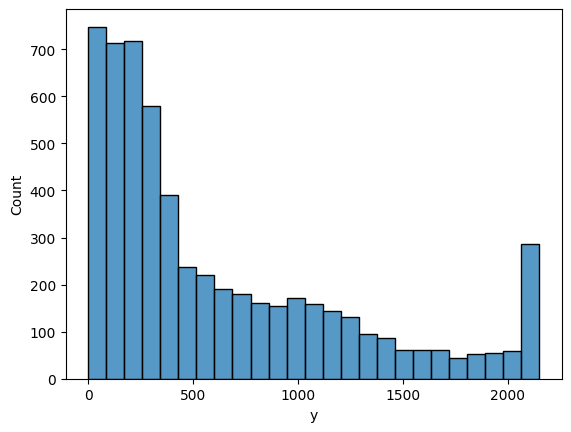

In [ ]:
sns.histplot(df_temp["y"])

<Axes: xlabel='y', ylabel='Count'>

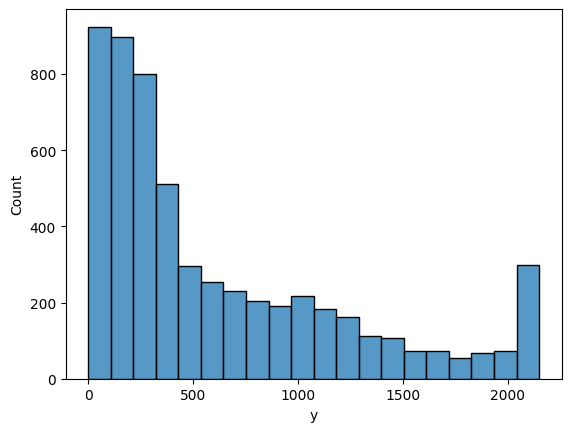

In [ ]:
sns.histplot(y_train, bins=20)

<Axes: xlabel='y', ylabel='Count'>

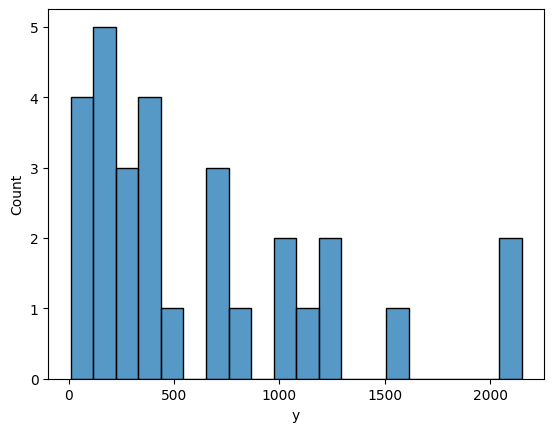

In [ ]:
sns.histplot(y_test, bins=20)

<Axes: ylabel='Count'>

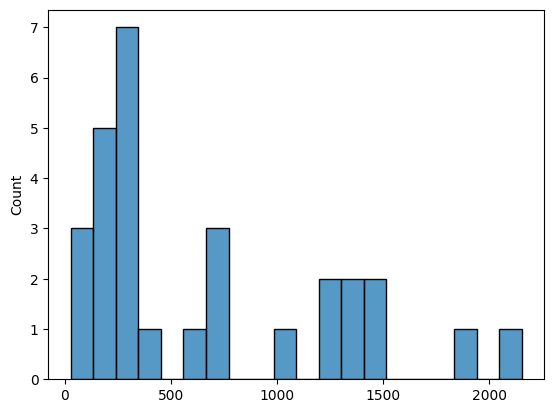

In [ ]:
sns.histplot(y_pred, bins=20)

<Axes: ylabel='y'>

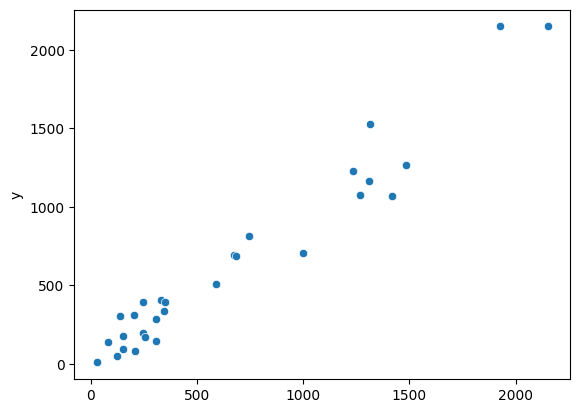

In [ ]:
sns.scatterplot(x=y_pred, y=y_test)

<Axes: xlabel='y', ylabel='Count'>

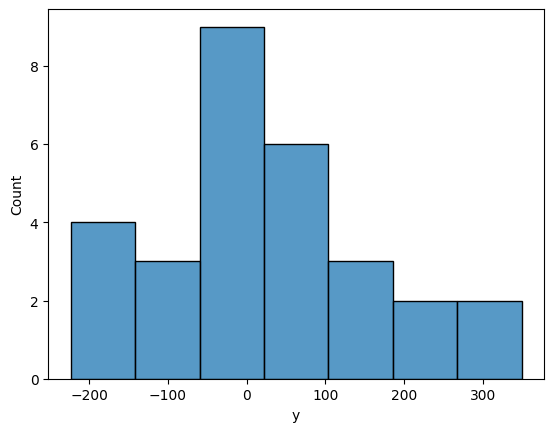

In [ ]:
sns.histplot(y_pred-y_test)

In [ ]:
print(np.sum(np.abs(y_pred - y_test) > 100))

12


In [ ]:
len(y_test)

29

In [ ]:
df_test.head()

,Date,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
0,29/07/2018,0,70,0.9,1945,0.0,0.0,0.0,Summer,No Holiday,Yes,7,29,6,0,-27.924565
1,29/07/2018,1,71,0.6,1799,0.0,0.0,0.0,Summer,No Holiday,Yes,7,29,6,0,-27.583916
2,29/07/2018,2,73,0.4,1832,0.0,0.0,0.0,Summer,No Holiday,Yes,7,29,6,0,-27.533839
3,29/07/2018,3,73,0.6,1893,0.0,0.0,0.0,Summer,No Holiday,Yes,7,29,6,0,-27.110290
4,29/07/2018,4,74,0.8,1816,0.0,0.0,0.0,Summer,No Holiday,Yes,7,29,6,0,-26.694947


In [ ]:

df_test=pre_processing(df_test)

In [ ]:
df_test.head()

,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
0,0,70,1945,0.0,0.0,2,1,7,29,6,0,-27.924565
1,1,71,1799,0.0,0.0,2,1,7,29,6,0,-27.583916
2,2,73,1832,0.0,0.0,2,1,7,29,6,0,-27.533839
3,3,73,1893,0.0,0.0,2,1,7,29,6,0,-27.110290
4,4,74,1816,0.0,0.0,2,1,7,29,6,0,-26.694947


In [ ]:
df_test[df_test['Functioning Day']==0]

,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
1224,0,73,1916,0.0,0.0,0,0,9,18,1,0,-16.180910
1225,1,71,1912,0.0,0.0,0,0,9,18,1,0,-15.599766
1226,2,74,1866,0.0,0.0,0,0,9,18,1,0,-15.342017
1227,3,76,1916,0.0,0.0,0,0,9,18,1,0,-15.499612
1228,4,78,1906,0.0,0.0,0,0,9,18,1,0,-15.233658
...,...,...,...,...,...,...,...,...,...,...,...,...
7771,19,71,589,0.0,0.0,0,0,9,11,1,1,-5.301607
7772,20,72,526,0.0,0.0,0,0,9,11,1,1,-5.525690
7773,21,74,498,0.0,0.0,0,0,9,11,1,0,-5.118553
7774,22,75,478,0.0,0.0,0,0,9,11,1,0,-4.985575


In [ ]:
X_test = df_test.drop(columns=['Month','Day'])
X_test=scaler.transform(X_test)
# You should update/remove the next line once you change the features used for training
y_test_predicted = XGBModel.predict(X_test)
df_test['y'] = y_test_predicted
#df_test['ID']=df_test_ids
df_test.head()
df_test[['y']].to_csv('/content/submission.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
df_test['y']

,y
0,14.707220
1,12.436445
2,6.500487
3,6.500487
4,6.500487
...,...
8275,68.861755
8276,68.861755
8277,70.249237
8278,70.249237


In [ ]:
X_test = df_test.drop(columns=['Month','Day'])
X_test.head()

,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Weekday,working_hour,temp_pca,y
0,0,70,1945,0.0,0.0,2,1,6,0,-27.924565,14.707220
1,1,71,1799,0.0,0.0,2,1,6,0,-27.583916,12.436445
2,2,73,1832,0.0,0.0,2,1,6,0,-27.533839,6.500487
3,3,73,1893,0.0,0.0,2,1,6,0,-27.110290,6.500487
4,4,74,1816,0.0,0.0,2,1,6,0,-26.694947,6.500487


In [ ]:
df_test.describe()

,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca,y
count,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000
mean,11.500000,61.292512,1528.207850,0.633585,0.183635,0.837681,0.937440,7.660870,16.886957,2.997101,0.666667,-13.373822,46.223396
std,6.922605,18.915421,567.849396,0.909489,1.304048,0.930866,0.242185,2.799404,7.912785,2.000843,0.471433,12.017589,71.016235
min,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,-35.817772,0.003943
25%,5.750000,47.000000,1102.750000,0.000000,0.000000,0.000000,1.000000,6.000000,10.000000,1.000000,0.000000,-22.956857,6.554173
50%,11.500000,61.000000,1828.000000,0.030000,0.000000,0.000000,1.000000,8.000000,16.000000,3.000000,1.000000,-14.890589,34.750492
75%,17.250000,76.000000,2000.000000,1.130000,0.000000,2.000000,1.000000,10.000000,24.000000,5.000000,1.000000,-4.476441,66.171463
max,23.000000,98.000000,2000.000000,3.520000,35.000000,2.000000,1.000000,12.000000,31.000000,6.000000,1.000000,20.489661,1418.173950


In [ ]:
df_test[df_test['Functioning Day']==0]

,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca,y
1224,0,73,1916,0.0,0.0,0,0,9,18,1,0,-16.180910,0.053117
1225,1,71,1912,0.0,0.0,0,0,9,18,1,0,-15.599766,0.030823
1226,2,74,1866,0.0,0.0,0,0,9,18,1,0,-15.342017,0.019159
1227,3,76,1916,0.0,0.0,0,0,9,18,1,0,-15.499612,0.019159
1228,4,78,1906,0.0,0.0,0,0,9,18,1,0,-15.233658,0.019159
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,19,71,589,0.0,0.0,0,0,9,11,1,1,-5.301607,0.019317
7772,20,72,526,0.0,0.0,0,0,9,11,1,1,-5.525690,0.019317
7773,21,74,498,0.0,0.0,0,0,9,11,1,0,-5.118553,0.019159
7774,22,75,478,0.0,0.0,0,0,9,11,1,0,-4.985575,0.019159
